## Linear Regression with Backpass

A simple implementation of a linear regression model.

In [1]:
import sys
sys.path.append('../../')
from matplotlib import pyplot as plt
from backpass.core import grad
import backpass.numpy as np
sys.version

'3.7.3 (default, May 24 2019, 17:28:54) \n[Clang 10.0.1 (clang-1001.0.46.4)]'

In [2]:
# Generate a synthetic dataset
num_points = 300
x = np.arange(1, num_points+1, dtype=np.float32)
y_true = np.random.normal(x + 2, 30)

# Initialize parameters randomly
m = np.random.rand(1)
b = np.random.rand(1)

m, b

(<backpass.core.Tensor.Tensor [0.08347812] -leaf ref: 0>,
 <backpass.core.Tensor.Tensor [0.59035443] -leaf ref: 0>)

In [3]:
# Display values

print('m:',m)
print('b', b)

m: <backpass.core.Tensor.Tensor [0.08347812] -leaf ref: 0>
b <backpass.core.Tensor.Tensor [0.59035443] -leaf ref: 0>


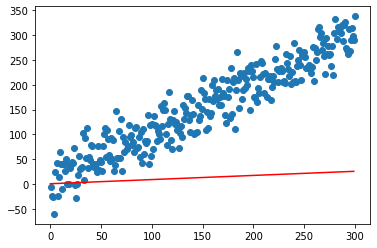

In [4]:
# Calculate initial linear model (should be bad)
res = []
for i in range(300):
    y_pred = (m * i) + b
    res.append(y_pred.value)

# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()

## Function to evaluate error of linear regression model

In [5]:
def calc_error(x, y_true, slope, y_intercept):
    y_pred = (slope * x) + y_intercept
    loss = np.square(y_pred - y_true)
    return loss

d_error = grad(calc_error)


## Run gradient descent to obtain best parameters

In [6]:
%%time
epochs = 1000
lr = 1e-6

for j in range(num_points*epochs):
    i = j % num_points
    d_error(x[i], y_true[i], m, b)
    m.value -= lr * m.grad
    b.value -= lr * b.grad
    m.grad, b.grad = 0, 0
    
m, b

CPU times: user 24.1 s, sys: 221 ms, total: 24.3 s
Wall time: 24.3 s


(<backpass.core.Tensor.Tensor [1.01798371] -leaf ref: 1>,
 <backpass.core.Tensor.Tensor [1.13613045] -leaf ref: 1>)

## Calculate and Plot the final linear regression model

<backpass.core.Tensor.Tensor [1.01798371] -leaf ref: 301> <backpass.core.Tensor.Tensor [1.13613045] -leaf ref: 301>


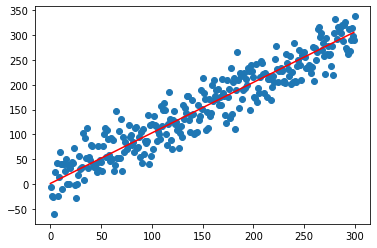

In [7]:
# Calculate final linear model
res = []
for i in range(300):
    y_pred = np.add(np.multiply(m, i), b)
    res.append(y_pred.value)

print(m, b)

# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()

## Using autograd to compare Results

In [8]:
import autograd.numpy as anp
from autograd import grad as agrad

# Initialize parameters randomly
s = anp.random.rand(1)
intercept = anp.random.rand(1)

def autograd_calc_error(x, y_true, slope, y_intercept):
    y_pred = (slope * x) + y_intercept
    loss = anp.square(y_pred - y_true)
    return loss

autograd_error = agrad(autograd_calc_error, [2, 3])

In [9]:
%%time

for j in range(num_points*epochs):
    i = j % num_points
    grad_s, grad_intercept = autograd_error(x[i], y_true[i], s, intercept)
    s -= lr * grad_s
    intercept -= lr * grad_intercept


CPU times: user 1min 19s, sys: 94.2 ms, total: 1min 19s
Wall time: 1min 20s


autograd: [1.01891441] [0.86143219]
backpass: [1.01798371] [1.13613045]


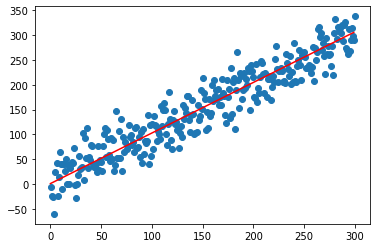

In [10]:
# Calculate final linear model
res = []
for i in range(300):
    y_pred = anp.add(anp.multiply(s, i), intercept)
    res.append(y_pred)

print('autograd:',s, intercept)
print('backpass:', m.value, b.value)

# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()

## Using Sklearn to check Results

In [11]:
from sklearn.linear_model import LinearRegression

x.value = x.value.reshape(-1, 1)

model = LinearRegression().fit(x.value, y_true.value)

print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope: [0.9737356]
intercept: 7.4671936


sklearn: [0.9737356] 7.4671936
autograd: [1.01891441] [0.86143219]
backpass: [1.01798371] [1.13613045]


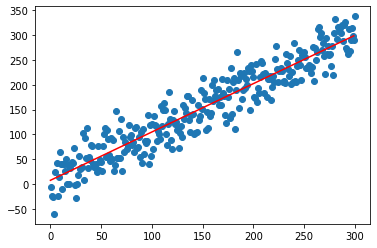

In [12]:
# Calculate final linear model
res = []
for i in range(300):
    y_pred = model.coef_*i + model.intercept_
    res.append(y_pred)

print('sklearn:', model.coef_, model.intercept_)
print('autograd:', s, intercept)
print('backpass:', m.value, b.value)
    
# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()